# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

In [11]:
WHO = 'policy makers, energy analysts, and environmental researchers'
WHAT = 'analyze global trends in nuclear energy generation and its role in the energy mix over time'
HOW = 'data acquisition, data analysis, and effective visualizations'

# 3. Homework - work with your own data

In [12]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("nuclear-energy-overview.csv")

print(df.head())

   Year     Month Nuclear Generating Units, Total Operable Units  \
0  1973   January                                  Not Available   
1  1973  February                                  Not Available   
2  1973     March                                  Not Available   
3  1973     April                                  Not Available   
4  1973       May                                  Not Available   

   Nuclear Generating Units, Net Summer Capacity  \
0                                         14.533   
1                                         14.533   
2                                         15.314   
3                                         15.314   
4                                         16.174   

   Nuclear Electricity Net Generation  \
0                                6246   
1                                5928   
2                                6649   
3                                5876   
4                                5697   

   Nuclear Share of Electricity

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [14]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Year                                            614 non-null    int64  
 1   Month                                           614 non-null    object 
 2   Nuclear Generating Units, Total Operable Units  614 non-null    object 
 3   Nuclear Generating Units, Net Summer Capacity   614 non-null    float64
 4   Nuclear Electricity Net Generation              614 non-null    int64  
 5   Nuclear Share of Electricity Net Generation     614 non-null    float64
 6   Nuclear Generating Units, Capacity Factor       614 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 33.7+ KB


,Year,"Nuclear Generating Units, Net Summer Capacity",Nuclear Electricity Net Generation,Nuclear Share of Electricity Net Generation,"Nuclear Generating Units, Capacity Factor"
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,1998.084691,85.607122,49806.475570,17.216612,76.496254
std,14.782137,23.286221,19647.098419,4.175843,16.281111
min,1973.000000,14.533000,5697.000000,3.900000,34.600000
25%,1985.000000,78.707750,31481.500000,15.525000,61.025000
50%,1998.000000,98.533000,57362.000000,18.800000,79.150000
75%,2011.000000,99.628000,65169.250000,20.100000,91.875000
max,2024.000000,102.206000,74649.000000,22.900000,101.600000


In [15]:
#Check for Duplicate Rows/ Values

duplicate_rows = df[df.duplicated()]

print("Total duplicate rows:", duplicate_rows.shape[0])
print(duplicate_rows)

Total duplicate rows: 0
Empty DataFrame
Columns: [Year, Month, Nuclear Generating Units, Total Operable Units, Nuclear Generating Units, Net Summer Capacity, Nuclear Electricity Net Generation, Nuclear Share of Electricity Net Generation, Nuclear Generating Units, Capacity Factor]
Index: []


In [16]:
#Mean, Median, Mode

print("Mean of Each Column:")
print(df.mean(numeric_only=True))

print("Median of Each Column:")
print(df.median(numeric_only=True))

print("Mode of Each Column:")
print(df.mode(numeric_only=True))

Mean of Each Column:
Year                                              1998.084691
Nuclear Generating Units, Net Summer Capacity       85.607122
Nuclear Electricity Net Generation               49806.475570
Nuclear Share of Electricity Net Generation         17.216612
Nuclear Generating Units, Capacity Factor           76.496254
dtype: float64
Median of Each Column:
Year                                              1998.000
Nuclear Generating Units, Net Summer Capacity       98.533
Nuclear Electricity Net Generation               57362.000
Nuclear Share of Electricity Net Generation         18.800
Nuclear Generating Units, Capacity Factor           79.150
dtype: float64
Mode of Each Column:
    Year  Nuclear Generating Units, Net Summer Capacity  \
0   1973                                         49.747   
1   1974                                            NaN   
2   1975                                            NaN   
3   1976                                            NaN   
4   1

In [17]:
#Check for Null Values in Each Column
print(df.isnull().sum())

#Rows with at Least One Missing Value
print(df[df.isnull().any(axis=1)])

#Replace Nulls in All Numeric Columns with Respective Mean
df.fillna(df.mean(numeric_only=True), inplace=True)

Year                                              0
Month                                             0
Nuclear Generating Units, Total Operable Units    0
Nuclear Generating Units, Net Summer Capacity     0
Nuclear Electricity Net Generation                0
Nuclear Share of Electricity Net Generation       0
Nuclear Generating Units, Capacity Factor         0
dtype: int64
Empty DataFrame
Columns: [Year, Month, Nuclear Generating Units, Total Operable Units, Nuclear Generating Units, Net Summer Capacity, Nuclear Electricity Net Generation, Nuclear Share of Electricity Net Generation, Nuclear Generating Units, Capacity Factor]
Index: []


In [18]:
print(df.columns.tolist())

['Year', 'Month', 'Nuclear Generating Units, Total Operable Units', 'Nuclear Generating Units, Net Summer Capacity', 'Nuclear Electricity Net Generation', 'Nuclear Share of Electricity Net Generation', 'Nuclear Generating Units, Capacity Factor']


In [19]:
#Maximum Values
print("Maximum Values per Column:")
print(df.max(numeric_only=True))

# Minimum Values
print("\nMinimum Values per Column:")
print(df.min(numeric_only=True))

Maximum Values per Column:
Year                                              2024.000
Nuclear Generating Units, Net Summer Capacity      102.206
Nuclear Electricity Net Generation               74649.000
Nuclear Share of Electricity Net Generation         22.900
Nuclear Generating Units, Capacity Factor          101.600
dtype: float64

Minimum Values per Column:
Year                                             1973.000
Nuclear Generating Units, Net Summer Capacity      14.533
Nuclear Electricity Net Generation               5697.000
Nuclear Share of Electricity Net Generation         3.900
Nuclear Generating Units, Capacity Factor          34.600
dtype: float64


In [20]:
print("Column Data Types:")
print(df.dtypes)
print()

Column Data Types:
Year                                                int64
Month                                              object
Nuclear Generating Units, Total Operable Units     object
Nuclear Generating Units, Net Summer Capacity     float64
Nuclear Electricity Net Generation                  int64
Nuclear Share of Electricity Net Generation       float64
Nuclear Generating Units, Capacity Factor         float64
dtype: object



In [21]:
#Isolate Categorical Columns
print(df.select_dtypes(include='object').columns)

Index(['Month', 'Nuclear Generating Units, Total Operable Units'], dtype='object')


In [22]:
#One-Hot Encoding for Categorical Variables
df_encoded = pd.get_dummies(df, drop_first=True)

In [23]:
#Histogram Table for 'Nuclear Electricity Net Generation'

column = 'Nuclear Electricity Net Generation'

data = df[column].dropna()

num_bins = 10

bins = np.linspace(data.min(), data.max(), num_bins + 1)

bin_indices = np.digitize(data, bins, right=False)

bin_counts = pd.Series(bin_indices).value_counts().reindex(range(1, num_bins+1), fill_value=0).sort_index()

histogram_table = pd.DataFrame({
    'bin_start': bins[:-1],
    'bin_end': bins[1:],
    'count': bin_counts.values
})

print(histogram_table)

   bin_start  bin_end  count
0     5697.0  12592.2     25
1    12592.2  19487.4     33
2    19487.4  26382.6     77
3    26382.6  33277.8     21
4    33277.8  40173.0     29
5    40173.0  47068.2     34
6    47068.2  53963.4     46
7    53963.4  60858.6     90
8    60858.6  67753.8    152
9    67753.8  74649.0    106


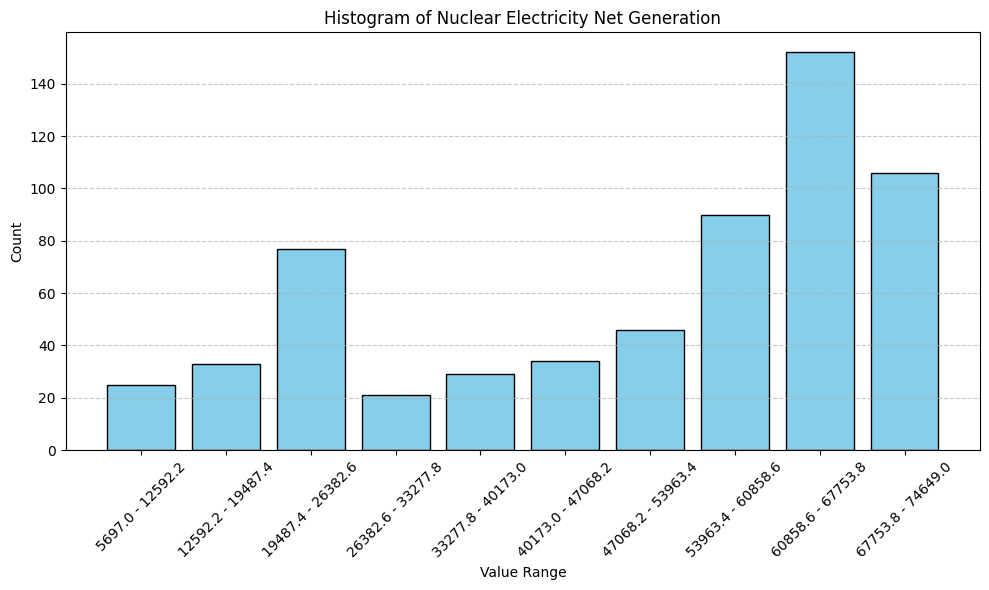

In [24]:
bin_labels = [f"{start:.1f} - {end:.1f}" for start, end in zip(histogram_table['bin_start'], histogram_table['bin_end'])]

plt.figure(figsize=(10,6))
plt.bar(bin_labels, histogram_table['count'], color='skyblue', edgecolor='black')

plt.title(f'Histogram of {column}')
plt.xlabel('Value Range')
plt.ylabel('Count')
plt.xticks(rotation=45)  # rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [25]:
Conclusion_Response = 'This data is certainly usable.'
Take_Away_1 = 'Nuclear electricity generation is concentrated mostly at low levels for most countries/data points.'
Take_Away_2 = 'A small number of countries generate very high amounts; pulls the distribution’s tail to the right.'
Take_Away_3 = 'A typical pattern in energy generation data where a few countries dominate production.'

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

In [26]:
import matplotlib.pyplot as plt

In [27]:
#Create DataFrame with Random Samples - Average Retail Price per Year of Products A, B, C, D

products = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E']
years = list(range(2018, 2023))

# Generate Random Price Data
np.random.seed(42)
data = {
    'Year': [],
    'Product': [],
    'Price': []
}

for product in products:
    prices = np.random.uniform(15, 25, size=len(years)).round(2)
    for year, price in zip(years, prices):
        data['Year'].append(year)
        data['Product'].append(product)
        data['Price'].append(price)

# Create DataFrame
df = pd.DataFrame(data)
print(df)

    Year    Product  Price
0   2018  Product A  18.75
1   2019  Product A  24.51
2   2020  Product A  22.32
3   2021  Product A  20.99
4   2022  Product A  16.56
5   2018  Product B  16.56
6   2019  Product B  15.58
7   2020  Product B  23.66
8   2021  Product B  21.01
9   2022  Product B  22.08
10  2018  Product C  15.21
11  2019  Product C  24.70
12  2020  Product C  23.32
13  2021  Product C  17.12
14  2022  Product C  16.82
15  2018  Product D  16.83
16  2019  Product D  18.04
17  2020  Product D  20.25
18  2021  Product D  19.32
19  2022  Product D  17.91
20  2018  Product E  21.12
21  2019  Product E  16.39
22  2020  Product E  17.92
23  2021  Product E  18.66
24  2022  Product E  19.56


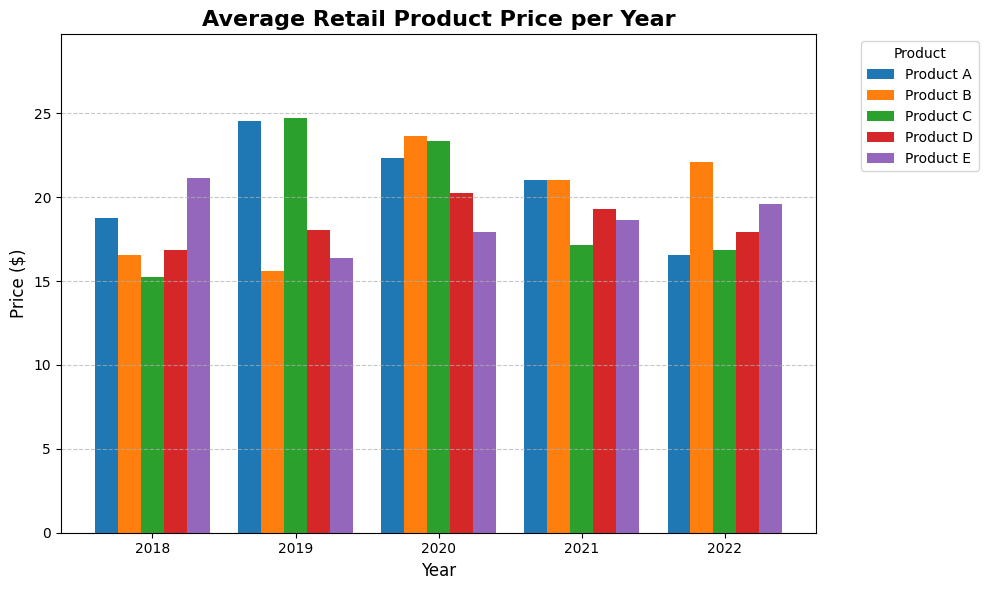

In [28]:
pivot_df = df.pivot_table(index='Year', columns='Product', values='Price', aggfunc='mean')

products = pivot_df.columns
years = pivot_df.index
num_products = len(products)
x = np.arange(len(years))
width = 0.8 / num_products

fig, ax = plt.subplots(figsize=(10, 6))

for i, product in enumerate(products):
    ax.bar(x + i * width, pivot_df[product], width, label=product)

ax.set_title('Average Retail Product Price per Year', fontsize=16, weight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Price ($)', fontsize=12)
ax.set_xticks(x + width * (num_products - 1) / 2)
ax.set_xticklabels(years)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_facecolor('white')

ax.set_ylim(0, pivot_df.max().max() + 5)

ax.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')

fig.tight_layout()
plt.show()